## Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Attribute Information

1) Age: age of the patient [years]

2) Sex: sex of the patient [M: Male, F: Female]

3) ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

4) RestingBP: resting blood pressure [mm Hg]

5) Cholesterol: serum cholesterol [mm/dl]

6) FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7) RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

8) MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

9) ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

10) Oldpeak: oldpeak = ST [Numeric value measured in depression]

11) ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

12) HeartDisease: output class [1: heart disease, 0: Normal]

## Source

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations
Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

In [1]:

import os, types
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

df = pd.read_csv('/Users/Ladi/Desktop/heart.csv')
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [3]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
df.shape

(918, 12)

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Redifining DataFrame

In [6]:
numerical = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
categorical = ['Sex','ChestPainType','FastingBS','RestingECG','ST_Slope','ExerciseAngina','HeartDisease']
df = df[numerical + categorical]
df.shape

(918, 12)

### Analyzing Numerical Variables 

In [7]:
sns.set(style='whitegrid', palette='deep', font_scale=1.1, rc={'figure.figsize':[8,5]})

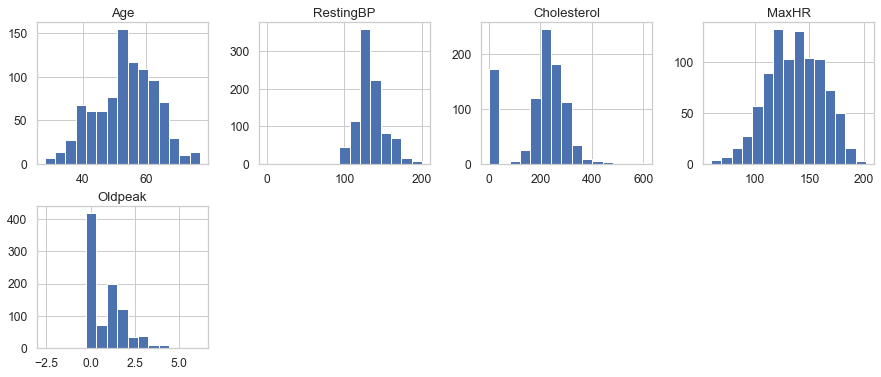

In [9]:
df[numerical].hist(bins=15, figsize=(15,6), layout=(2,4));

### Analyzing Categorical Variables

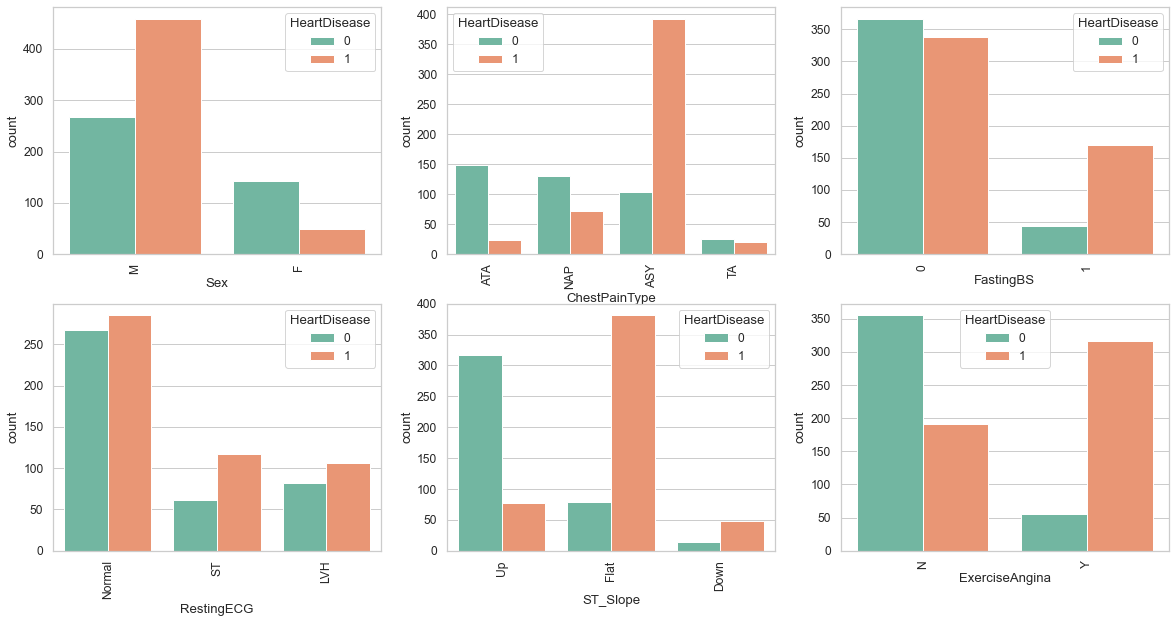

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))

for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=df[variable], hue='HeartDisease', data=df, ax=subplot, palette='Set2')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        


### Analyzing Relationships Between Numerical Variables

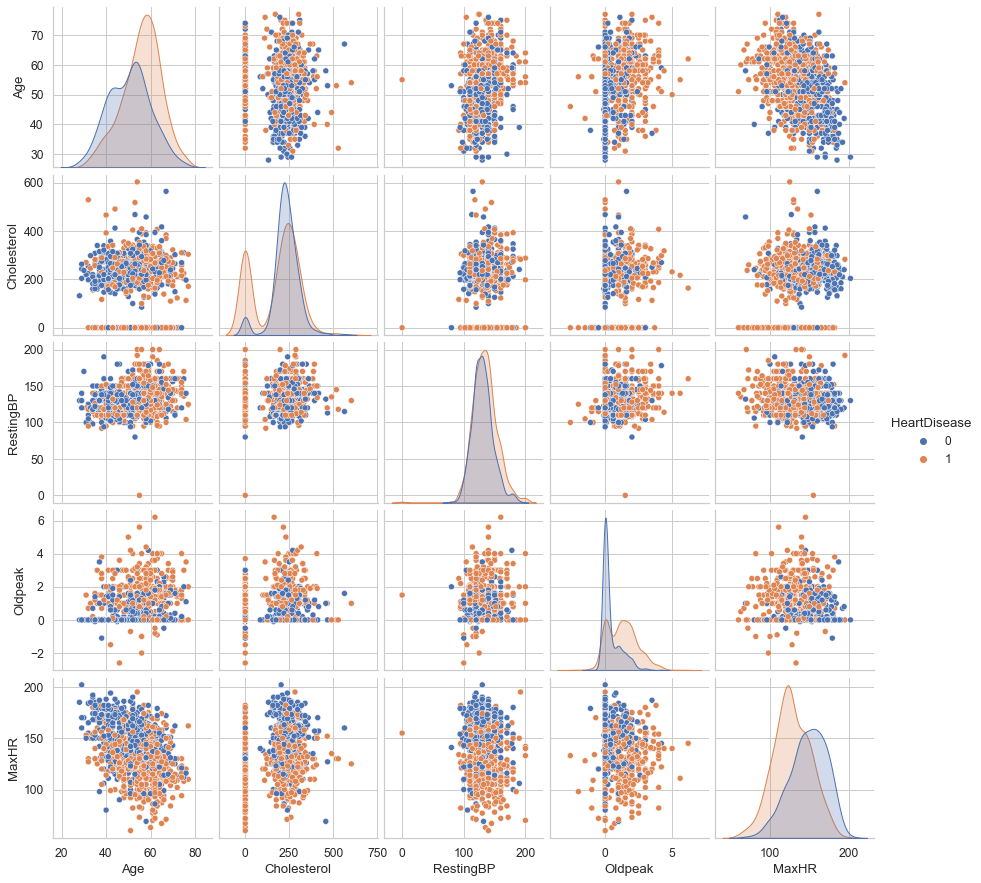

In [13]:
continous_features = ['Age', 'Cholesterol', 'RestingBP', 'Oldpeak','MaxHR']  
sns.pairplot(df[continous_features + ['HeartDisease']], hue='HeartDisease')

### Analyzing Relationships Between Numerical nd Categorical Variables

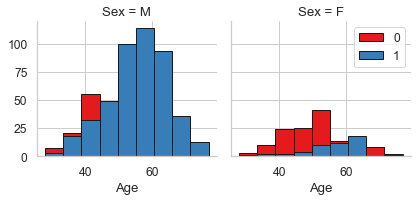

In [14]:
bins = np.linspace(df.Age.min(), df.Age.max(), 10)
g = sns.FacetGrid(df, col="Sex", hue="HeartDisease", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

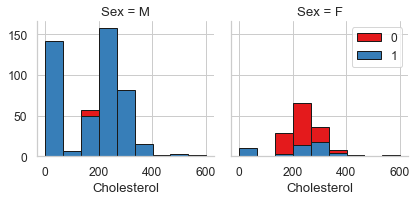

In [15]:
bins = np.linspace(df.Cholesterol.min(), df.Cholesterol.max(), 10)
g = sns.FacetGrid(df, col="Sex", hue="HeartDisease", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Cholesterol', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

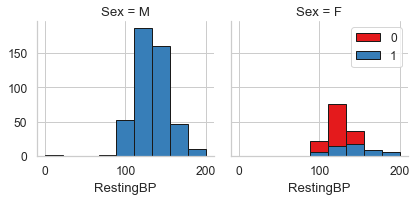

In [16]:
bins = np.linspace(df.RestingBP.min(), df.RestingBP.max(), 10)
g = sns.FacetGrid(df, col="Sex", hue="HeartDisease", palette="Set1", col_wrap=2)
g.map(plt.hist, 'RestingBP', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

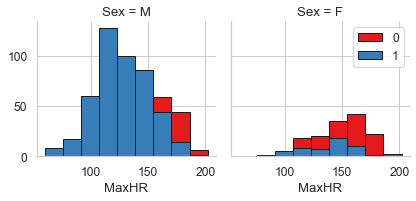

In [17]:
bins = np.linspace(df.MaxHR.min(), df.MaxHR.max(), 10)
g = sns.FacetGrid(df, col="Sex", hue="HeartDisease", palette="Set1", col_wrap=2)
g.map(plt.hist, 'MaxHR', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

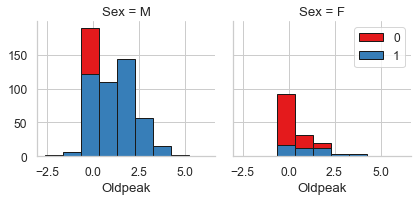

In [18]:
bins = np.linspace(df.Oldpeak.min(), df.Oldpeak.max(), 10)
g = sns.FacetGrid(df, col="Sex", hue="HeartDisease", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Oldpeak', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

/var/folders/cf/yh2vvpdn0klby68k9zrttfv00000gp/T/ipykernel_31104/1087690279.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


(7.5, -0.5)

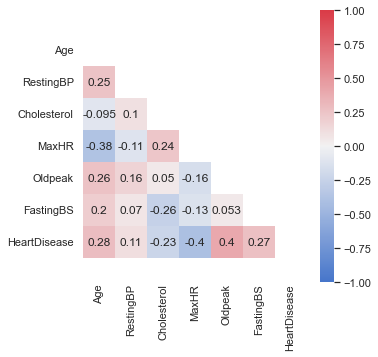

In [19]:
sns.set(style="white") 
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(5,5))
cmap = sns.diverging_palette(255, 10, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, annot=True, square=True, cmap=cmap,vmin=-1, vmax=1, ax=ax)  

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

## Convert Categorical features to numerical values

### Sex:

In [20]:
df['Sex'].replace(to_replace=['M','F'], value=[0,1],inplace=True)
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,FastingBS,RestingECG,ST_Slope,ExerciseAngina,HeartDisease
0,40,140,289,172,0.0,0,ATA,0,Normal,Up,N,0
1,49,160,180,156,1.0,1,NAP,0,Normal,Flat,N,1
2,37,130,283,98,0.0,0,ATA,0,ST,Up,N,0
3,48,138,214,108,1.5,1,ASY,0,Normal,Flat,Y,1
4,54,150,195,122,0.0,0,NAP,0,Normal,Up,N,0


### ChestPainType:

In [21]:
ChestPainType_dummy = pd.get_dummies(df['ChestPainType'])
ChestPainType_dummy.rename(columns={'TA':'ChestPainType-TA','ATA':'ChestPainType-ATA','NAP':'ChestPainType-NAP','ASY':'ChestPainType-ASY'}, inplace=True)
df = pd.concat([df,ChestPainType_dummy],axis=1)
df.drop('ChestPainType',axis=1,inplace=True)
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,FastingBS,RestingECG,ST_Slope,ExerciseAngina,HeartDisease,ChestPainType-ASY,ChestPainType-ATA,ChestPainType-NAP,ChestPainType-TA
0,40,140,289,172,0.0,0,0,Normal,Up,N,0,0,1,0,0
1,49,160,180,156,1.0,1,0,Normal,Flat,N,1,0,0,1,0
2,37,130,283,98,0.0,0,0,ST,Up,N,0,0,1,0,0
3,48,138,214,108,1.5,1,0,Normal,Flat,Y,1,1,0,0,0
4,54,150,195,122,0.0,0,0,Normal,Up,N,0,0,0,1,0


### RestingECG:

In [22]:
RestingECG_dummy = pd.get_dummies(df['RestingECG'])
RestingECG_dummy.rename(columns={'Normal':'RestingECG-Normal','ST':'RestingECG-ST','LVH':'RestingECG-LVH'}, inplace=True)
df = pd.concat([df,RestingECG_dummy],axis=1)
df.drop('RestingECG',axis=1,inplace=True)
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,FastingBS,ST_Slope,ExerciseAngina,HeartDisease,ChestPainType-ASY,ChestPainType-ATA,ChestPainType-NAP,ChestPainType-TA,RestingECG-LVH,RestingECG-Normal,RestingECG-ST
0,40,140,289,172,0.0,0,0,Up,N,0,0,1,0,0,0,1,0
1,49,160,180,156,1.0,1,0,Flat,N,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,Up,N,0,0,1,0,0,0,0,1
3,48,138,214,108,1.5,1,0,Flat,Y,1,1,0,0,0,0,1,0
4,54,150,195,122,0.0,0,0,Up,N,0,0,0,1,0,0,1,0


### ExerciseAngina:

In [23]:
df['ExerciseAngina'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,FastingBS,ST_Slope,ExerciseAngina,HeartDisease,ChestPainType-ASY,ChestPainType-ATA,ChestPainType-NAP,ChestPainType-TA,RestingECG-LVH,RestingECG-Normal,RestingECG-ST
0,40,140,289,172,0.0,0,0,Up,0,0,0,1,0,0,0,1,0
1,49,160,180,156,1.0,1,0,Flat,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,Up,0,0,0,1,0,0,0,0,1
3,48,138,214,108,1.5,1,0,Flat,1,1,1,0,0,0,0,1,0
4,54,150,195,122,0.0,0,0,Up,0,0,0,0,1,0,0,1,0


### ST_Slope:

In [24]:
ST_Slope_dummy = pd.get_dummies(df['ST_Slope'])
ST_Slope_dummy.rename(columns={'Up':'ST_Slope-Up','Flat':'ST_Slope-Flat','Down':'ST_Slope-Down'}, inplace=True)
df = pd.concat([df,ST_Slope_dummy],axis=1)
df.drop('ST_Slope',axis=1,inplace=True)
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,FastingBS,ExerciseAngina,HeartDisease,ChestPainType-ASY,ChestPainType-ATA,ChestPainType-NAP,ChestPainType-TA,RestingECG-LVH,RestingECG-Normal,RestingECG-ST,ST_Slope-Down,ST_Slope-Flat,ST_Slope-Up
0,40,140,289,172,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,48,138,214,108,1.5,1,0,1,1,1,0,0,0,0,1,0,0,1,0
4,54,150,195,122,0.0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [25]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Confusion Matrix Function.

In [26]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['no heart disease', 'heart disease']); ax.yaxis.set_ticklabels(['no heart disease', 'heart disease'])

## Feature Selection

Let's define feature sets, X:

In [27]:
X = df[['Age','Sex','RestingBP','Cholesterol','FastingBS','MaxHR','ExerciseAngina','Oldpeak','ChestPainType-ASY','ChestPainType-ATA','ChestPainType-NAP','ChestPainType-TA','RestingECG-LVH','RestingECG-Normal','RestingECG-ST','ST_Slope-Down','ST_Slope-Flat','ST_Slope-Up']]
X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType-ASY,ChestPainType-ATA,ChestPainType-NAP,ChestPainType-TA,RestingECG-LVH,RestingECG-Normal,RestingECG-ST,ST_Slope-Down,ST_Slope-Flat,ST_Slope-Up
0,40,0,140,289,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1
1,49,1,160,180,0,156,0,1.0,0,0,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,0,0.0,0,1,0,0,0,0,1,0,0,1
3,48,1,138,214,0,108,1,1.5,1,0,0,0,0,1,0,0,1,0
4,54,0,150,195,0,122,0,0.0,0,0,1,0,0,1,0,0,0,1


What are our lables?

In [28]:
Y = df['HeartDisease'].values
Y[0:5]

array([0, 1, 0, 1, 0])

### Normalize Data

In [29]:
transform = preprocessing.StandardScaler()
X = transform.fit(X).transform(X)

## Model Development

Train/Test split:

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

### Logistic Regression

In [31]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

lr=LogisticRegression()

In [32]:
logreg_cv = GridSearchCV(lr,parameters,cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [33]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8705479452054794


In [34]:
print('Accuracy is ', logreg_cv.score(X_test,Y_test))

Accuracy is  0.8369565217391305


Confusion Matrix:

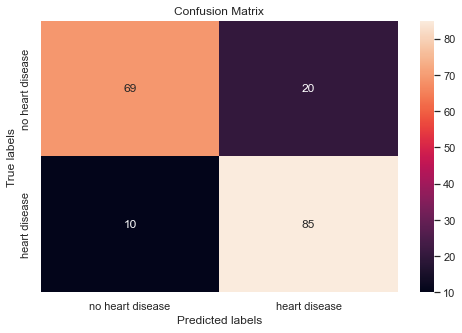

In [35]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### Support Vector Machine (SVM)

In [36]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [37]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [38]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'}
accuracy : 0.8774157719363197


In [39]:
print('Accuracy is', svm_cv.score(X_test, Y_test))

Accuracy is 0.8315217391304348


Confusion Matrix:

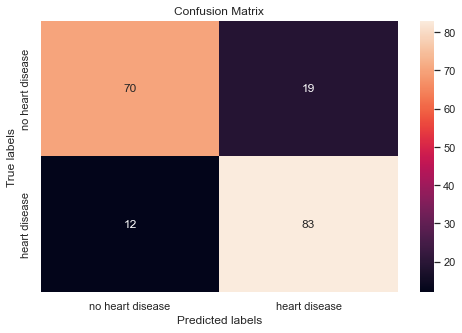

In [40]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### Decision Tree

In [41]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [42]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [43]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8623843021103296


In [44]:
print('Accuracy is', tree_cv.score(X_test,Y_test))

Accuracy is 0.8532608695652174


Confusion Matrix:

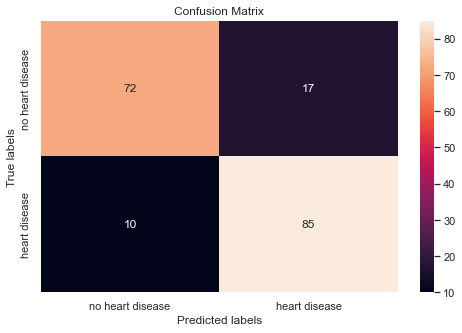

In [45]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### K-Nearest Neighbors (KNN)

In [46]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [47]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [48]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8705294335431321


In [49]:
print('Accuracy is', knn_cv.score(X_test,Y_test))

Accuracy is 0.8532608695652174


Confusion Matrix:

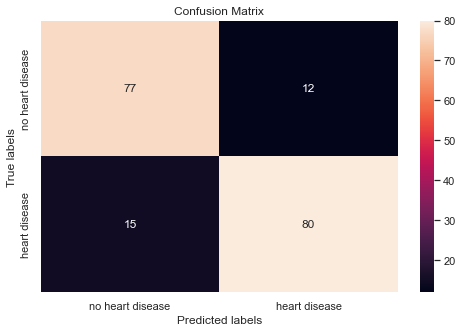

In [50]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Finding Best Model and Accuracy

In [51]:
models = {'kneighbors': knn_cv.best_score_,
         'DecisionTree': tree_cv.best_score_,
         'SVM': svm_cv.best_score_,
         'LogisticRegression': logreg_cv.best_score_ }

best_model = max(models, key = models.get)
print('The best model is',best_model, 'with a score of',models[best_model])

The best model is SVM with a score of 0.8774157719363197
